#### Q1

In [1]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import csv
import random
import math
import operator
import pandas as pd
import matplotlib.pyplot as plt

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.9
    loadDataset('iris.csv', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 45
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()


Train set: 132
Test set: 17
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-versicolor', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
> predicted='Iris-versicolor', actual='Iris-virginica'
> predicted='Iris-virginica', actual='Iris-virginica'
Accuracy: 88.23529411764706%


### Part (i)

In [2]:

Splits = [['0.10', 82.84], ['0.35', 91.21], ['0.55', 94.81], ['0.70', 95.83], ['0.85', 94.44]]
 
# Create the pandas DataFrame
k2_df = pd.DataFrame(Splits, columns = ['Split', 'Accuracy in %'])
 
# print dataframe.
k2_df

,Split,Accuracy in %
0,0.10,82.84
1,0.35,91.21
2,0.55,94.81
3,0.70,95.83
4,0.85,94.44


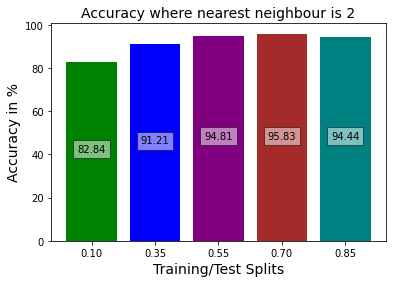

In [3]:
# Function to add labels to the grouped barcharts
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                  bbox = dict(facecolor = 'white', alpha = .5))


New_Colors = ['green','blue','purple','brown','teal']
plt.bar(k2_df['Split'], k2_df['Accuracy in %'], color=New_Colors)
plt.title('Accuracy where nearest neighbour is 2', fontsize=14)
plt.xlabel('Training/Test Splits', fontsize=14)
plt.ylabel('Accuracy in %', fontsize=14)
plt.grid(False)
addlabels(k2_df['Split'], k2_df['Accuracy in %'])
plt.show()

### Part (ii)

In [4]:
K_Scores = [['2', 95.65], ['4', 100], ['8', 100], ['12', 100], ['18', 100], ['23', 94.12], ['28', 94.12], ['32', 92], ['38', 94.44], ['45', 84.21]]

# Create the pandas DataFrame
K_scores_df = pd.DataFrame(K_Scores, columns = ['K Scores', 'Accuracy in %'])
 
# print dataframe.
K_scores_df

,K Scores,Accuracy in %
0,2,95.65
1,4,100.00
2,8,100.00
3,12,100.00
4,18,100.00
5,23,94.12
6,28,94.12
7,32,92.00
8,38,94.44
9,45,84.21


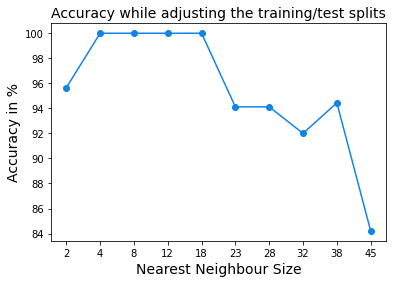

In [5]:
# Function to add labels to the grouped barcharts
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                  bbox = dict(facecolor = 'white', alpha = .5))


# New_Colors = ['green','blue','purple','brown','teal']
plt.plot(K_scores_df['K Scores'], K_scores_df['Accuracy in %'],'-o',color='#1184e8')
plt.title('Accuracy while adjusting the training/test splits', fontsize=14)
plt.xlabel('Nearest Neighbour Size', fontsize=14)
plt.ylabel('Accuracy in %', fontsize=14)
plt.grid(False)

plt.show()

#### Q2

In [6]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

def first_last_letter(word):
    return {'first_letter': word[0:1], 'last_letter' : word[-1:]}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

labeled_names = male_names + female_names
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(gender_features('Mark'))
ans2 = classifier.classify(gender_features('Precilla'))

print("Mark is:", ans1)
print("Precilla is:", ans2)


classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))

Mark is: male
Precilla is: female
Most Informative Features
             last_letter = 'a'            female : male   =     35.8 : 1.0
             last_letter = 'k'              male : female =     30.6 : 1.0
             last_letter = 'f'              male : female =     15.9 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.9 : 1.0
0.77


In [49]:
#question 2
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

def middle_character(word):
    """If the length of the string is odd return the middle character 
    and return the middle two characters if the string length is even"""
    return {'Middle Character': word[(len(word)-1)//2:(len(word)+2)//2]}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
res_accuracy = []

print("------ Last letter ------")
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(gender_features('Anthony'))
ans2 = classifier.classify(gender_features('Garret'))
ans3 = classifier.classify(gender_features('Cassey'))
ans4 = classifier.classify(middle_character('Susanne'))
print("Anthony is:", ans1)
print("Garret is:", ans2)
print("Cassey is:", ans3)
print("Susanne is:", ans4)

classifier.show_most_informative_features(5)
print("The accuracy is:", nltk.classify.accuracy(classifier, test_set))
res_accuracy.append(nltk.classify.accuracy(classifier, test_set))

print("------ Middle character ------")
featuresets_middle_char = [(middle_character(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets_middle_char[500:], featuresets_middle_char[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(middle_character('Anthony'))
ans2 = classifier.classify(middle_character('Garret'))
ans3 = classifier.classify(middle_character('Cassey'))
ans4 = classifier.classify(middle_character('Susanne'))
print("Anthony is:", ans1)
print("Garret is:", ans2)
print("Cassey is:", ans3)
print("Susanne is:", ans4)

classifier.show_most_informative_features(5)
print("The accuracy is:", nltk.classify.accuracy(classifier, test_set))
res_accuracy.append(nltk.classify.accuracy(classifier, test_set))


------ Last letter ------
Anthony is: female
Garret is: male
Cassey is: female
Susanne is: female
Most Informative Features
             last_letter = 'a'            female : male   =     36.9 : 1.0
             last_letter = 'k'              male : female =     32.3 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'd'              male : female =     10.0 : 1.0
The accuracy is: 0.75
------ Middle character ------
Anthony is: female
Garret is: female
Cassey is: female
Susanne is: female
Most Informative Features
        Middle Character = 'lm'             male : female =     11.6 : 1.0
        Middle Character = 'nr'             male : female =     10.5 : 1.0
        Middle Character = 'ho'             male : female =      7.2 : 1.0
        Middle Character = 'va'             male : female =      7.2 : 1.0
        Middle Character = 'el'           female

In [16]:
Res_Percent = [round(my_num*100, 2) for my_num in res_accuracy]
Res_Percent

[73.8, 63.6]

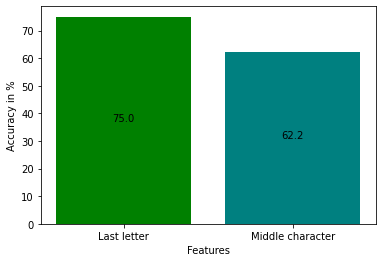

In [12]:
Sample_Colors = ['green','teal']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

fig, ax = plt.subplots() 
plt.bar([0, 1], Res_Percent, color=Sample_Colors)
labels = ['Last letter', 'Middle character']
plt.xticks([0, 1], labels)
plt.ylabel('Accuracy in %')
plt.xlabel('Features')
addlabels([0, 1], Res_Percent)
plt.show()